Project: Prediction mean values and exceeding limit days of fine Particulate Matter (PM2.5) in the air - Milan (Italy).

Student: **Alessandro Monolo** | 1790210

Lecturer: Jonas Moons

Fundamentals of Machine Learning - Master Data-Driven Design, Hogeschool Utrecht.

August 2021 - Block E

## Data Merging and Pre-Processing of harmful element data frames (PM10, PM2.5, NO, NO2, CO, O), in Milan from 01.01.2014 - 31.12.2019

Import libraries which can may be useful:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sprint_info(df):
    print('This is df shape: ', df.shape, '\n')
    print(df.info(), '\n')
    print('This is df: \n', df)

## Data Merging

Import my  PM10, PM2.5, NO, NO2, CO & O datasets of Milan from January 2014 to December 2019:

The here above harmful elements affect the quality of air and cause every year premature mortality among the local population where the concentration values exceed the max. allowed thresholds, *(Doreswamy et al., 2020), (Carugno et al., 2016), (Khomenko, S. et al., 2021)*.

In [3]:
df_PM10 = pd.read_csv('Milan_PM10_2014_2019.csv')

In [4]:
df_PM25 = pd.read_csv('Milan_PM25_2014_2019.csv')

In [5]:
df_NO = pd.read_csv('Milan_NO_2014_2019.csv')

In [6]:
df_NO2 = pd.read_csv('Milan_NO2_2014_2019.csv')

In [7]:
df_CO = pd.read_csv('Milan_CO_2014_2019.csv')

In [8]:
df_O = pd.read_csv('Milan_O_2014_2019.csv')

Merging the here above uploaded dataframes per each harmful element into one complete dataframe using df column Datetime as common parameter:

In [9]:
df_1 = pd.merge(df_PM10, df_PM25, on="DateTime")

In [10]:
df_2 = pd.merge(df_1, df_NO, on="DateTime")

In [11]:
df_3 = pd.merge(df_2, df_NO2, on="DateTime")

In [12]:
df_4 = pd.merge(df_3, df_CO, on="DateTime")

In [13]:
df_HE = pd.merge(df_4, df_O, on="DateTime")

## Data Pre-Processing

Create a new data frame column based on the **Equivalence from PM 2.5 value to passive cigarettes breathed per day**.

Model from [Berkeley Earth](http://berkeleyearth.org/air-pollution-and-cigarette-equivalence/), (Earth, 2015).

*1 cigarette is equivalent to an air pollution of 22 μg/m3 for one day.*

In [14]:
df_HE['Passive_Cigarette'] = df_HE['PM2.5 µg/m³'] / 22

Changing the number of decimals (1), on three dataframe columns listed in a new variable cols:

In [15]:
cols = ['NO µg/m³','NO2 µg/m³','CO mg/m³', 'O µg/m³', 'Passive_Cigarette']

In [16]:
df_HE[cols] = df_HE[cols].round(1)

Transforming column DateTime in datetime64[ns]:

In [17]:
df_HE['DateTime'] = pd.to_datetime(df_HE['DateTime'])

Create a new df column based on days where the **PM 2.5 daily concentration exceeded the max. allowed thresholds** in Milan - mean value equals to 25 µg/m³, (Standards - Air Quality - Environment - European Commission, 2020)

In [18]:
conditions = [(df_HE['PM2.5 µg/m³'] >= 25.0)]

In [19]:
values = [1]

In [20]:
df_HE['Over_PM25_Limit'] = np.select(conditions, values)

Create the new Month column applying labmda function with month as parameter to get the number of the month per each DataTime row:

In [21]:
df_HE["Month"] = df_HE["DateTime"].apply(lambda time: time.month)

## Data exploration & visualization

After plotting scatterplots of NO µg/m³ versus O µg/m³ I apply .mask and .between functions to drop outliers from the same two columns:

In [22]:
df_HE['NO µg/m³'].mask(df_HE["NO µg/m³"].between(400, 600), inplace=True)

In [23]:
df_HE['O µg/m³'].mask(df_HE["O µg/m³"].between(120, 160), inplace=True)

### 1 - Total passive cigarettes smoked per month from 2014 to 2019 - Milan

Data visualization of passive cigarettes smoked every day from 2014 to 2019 per month.

Using ascending sort parameter to check when Milan population breathed more passive cigarettes among months of the year.

In [24]:
from matplotlib import cm

In [25]:
sns.set(style='darkgrid') # Set the gridstyle background

In [26]:
color = cm.gray(np.linspace(.18, .95, 30)) # Set the color array map for this visualization

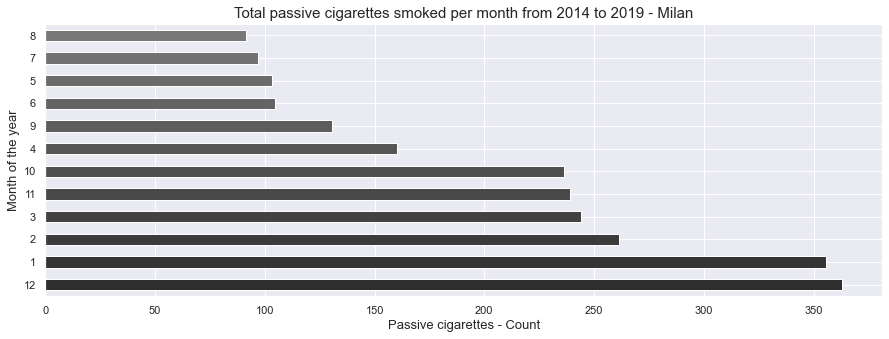

In [27]:
fig, axs = plt.subplots(figsize=(15, 5))
df_HE.groupby(df_HE["Month"])["Passive_Cigarette"].sum().sort_values(ascending=False).plot(kind='barh', rot=0, color=color)
plt.title('Total passive cigarettes smoked per month from 2014 to 2019 - Milan', size=15)
plt.xlabel('Passive cigarettes - Count', size=13)
plt.ylabel('Month of the year', size=13)
plt.savefig('Number of passive cigarettes smoked during months.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

**Conclusion:**

Each montlhy count takes into consideration a sum of 6 years, from 2014 and 2019, therefore 360 cigarettes smoked passively depend on 6 years (60 cigarettes per each December).

As well as for August, which counts approximately 90 cigarettes smoked passively among 6 years, thus 15 passive cigarettes breathed each August.

### 2 - Total number of days where PM2.5 limits were overpassed per month from 2014 to 2019 - Milan

Using the same kind of data visualization to understand if there is a similar behaviour among the overpassed daily PM2.5 limit, from the same time line in Milan.

In [28]:
color = cm.inferno(np.linspace(.2, .9, 30)) # Set the color array map for this visualization

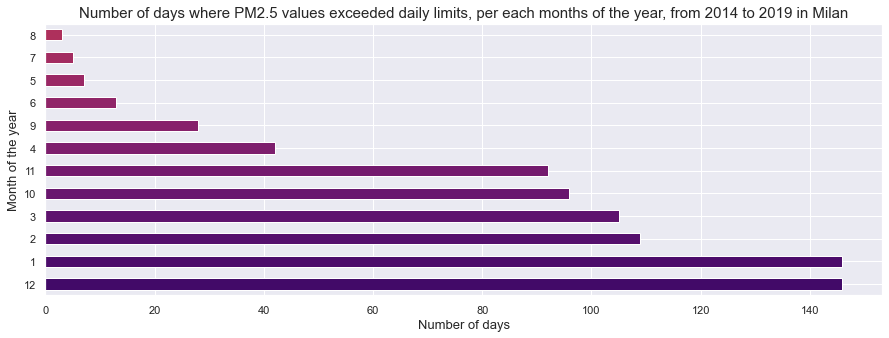

In [29]:
fig, axs = plt.subplots(figsize=(15, 5))
df_HE.groupby(df_HE["Month"])["Over_PM25_Limit"].sum().sort_values(ascending=False).plot(kind='barh', rot=0, color=color)
plt.title('Number of days where PM2.5 values exceeded daily limits, per each months of the year, from 2014 to 2019 in Milan', size=15)
plt.xlabel('Number of days', size=13)
plt.ylabel('Month of the year', size=13)
plt.savefig('Harmful days during months per PM2.5 over limit values.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

Each monthly count takes into consideration a sum of 6 years, from 2014 and 2019, therefore 145 harmful days in December and janaury means approxiately 75% of the month [145/(31*6)].

**Conclusion:**

The two visualizations are closely related to each other as can be seen from the two similar trends and the
similarity with the months showing the worst / best values.

As we can see from these two barplots, the worste months are ecember and January.
October, November, February, March instead saw a decrease in the recorded values. 
Different situation regarding the spring/summer months, where the limits are respected and the passive cigarettes
smoked turn out to be about half for each day between the months of May, June, August and September.

### 3 -  Ozone distribution during months of the year in µg/m³

Distribution of ozone values during the months of the year, using the days in which the PM2.5 values have been 
exceeded as a differentiator

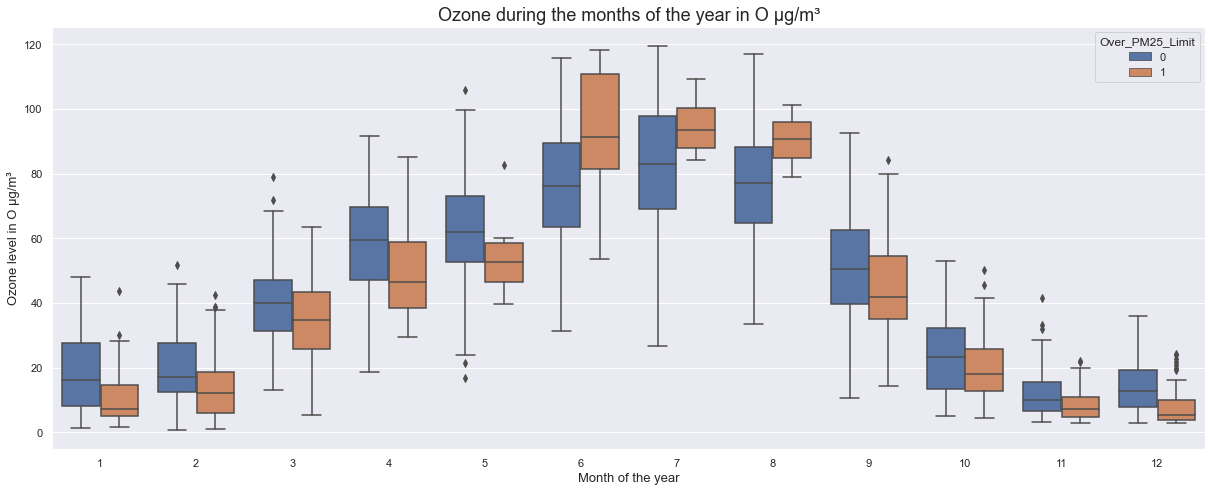

In [30]:
plt.figure(figsize=(17,7))
sns.boxplot(x='Month', y='O µg/m³', data=df_HE, hue='Over_PM25_Limit')
plt.title('Ozone during the months of the year in O µg/m³', size=18)
plt.xlabel('Month of the year', size=13)
plt.ylabel('Ozone level in O µg/m³', size=13)
plt.tight_layout()
plt.savefig('Ozone distribution during the months of the year.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

**Conclusion:**

Solar radiation is higher during the summer months and it causes the rising of the daily ozone level in Milan, with average values around 80 O µg / m³ between June and August.
Furthermore, where pm2.5 is less than 25 µg/m³ as daily mean value the Ozone level is lower, except in June where the harmful days see an increment of Ozone concentration. 

### 4 - PM2.5 daily values from January 2014 to December 2019 in Milan

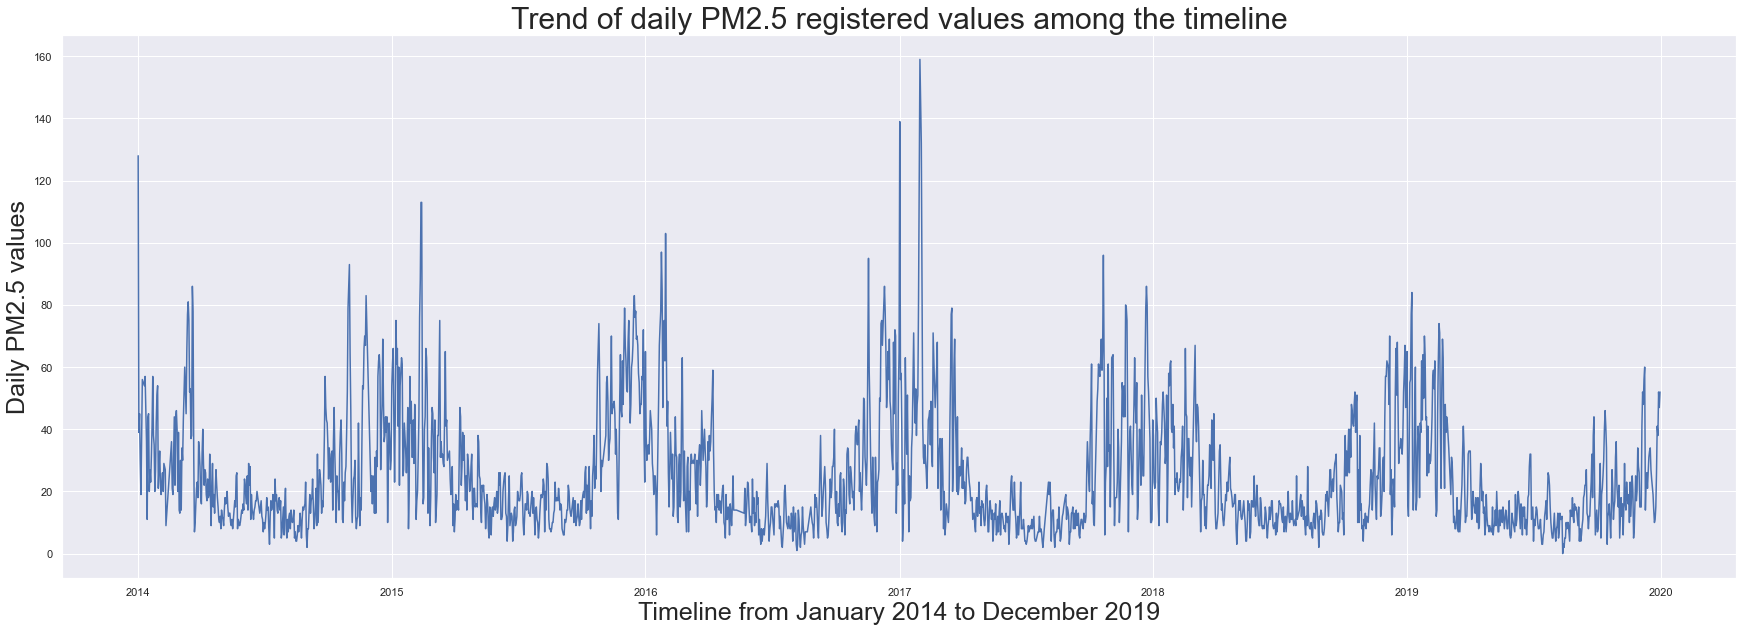

In [31]:
plt.figure(figsize=(30, 10))                                       # Set dimension of the figure
sns.set_style('darkgrid')
plot = sns.lineplot(x=df_HE['DateTime'], y=df_HE['PM2.5 µg/m³'])   # Set type of figure, a line plot with x= the timesearies and y= the mean of steps per day

for ind, label in enumerate(plot.get_xticklabels()):              # How to decrease the density of x-ticks in seaborn
    if ind % 0.5 == 0:                                            # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Trend of daily PM2.5 registered values among the timeline", size=30)  # Set the title of the figure
plt.xlabel("Timeline from January 2014 to December 2019", size=25)              #set the x-label
plt.ylabel("Daily PM2.5 values", size=25)                                        #set the y-label

plt.savefig('Timeline of PM2.5 from 2014 to 2019.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show() 

**Conclusion:**

The overall trend of the concentration of PM2.5 in the air confirms the trend shown previously, observing values which tend to be higher during the cold months and lower during the spring and summer months.
Two of the highest daily concentration peaks of fine particles occurred during the first day of the year (referring to January 1st of 2014 & 2017), due to the firework blasts for the celebration of the New Year. Hypothesis not accredited but plausible given the local tradition.

### 5 - Density and distribution plot of two harmful elements: CO vs. NO

Plotting the concentration of two harmful substances, such as CO and NO in the air through a jointplot visualization

<Figure size 7800x7800 with 0 Axes>

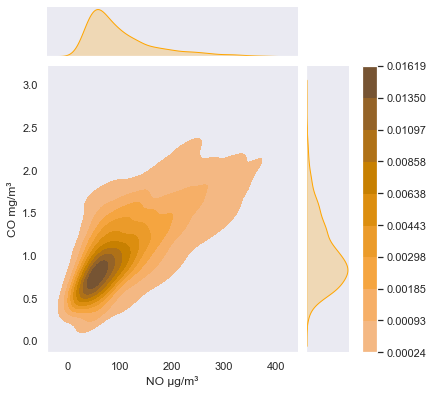

In [32]:
sns.set_style('dark')
plt.figure(figsize=(13,13), dpi=600)

kdeplot = sns.jointplot(x=df_HE["NO µg/m³"], y=df_HE["CO mg/m³"], kind='kde', color="orange", legend=True, cbar=True, fill=True, thresh=0.025)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()

# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])

# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

plt.savefig('CO & NO density plot Milan 2014 2019.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)
plt.show()

#### Conclusion

The higher concentration of the two substances is around 0.5 / 1 mg / m³ of CO and 50/100 µg / m³ of NO.

The distribution has a linear trend for both of the substances present in the air, showing a strong correlation between the two harmful substances.

### 8 - Visualization of NaN missing values from each columns of df dataframe

Check any missing values along my dataframe:

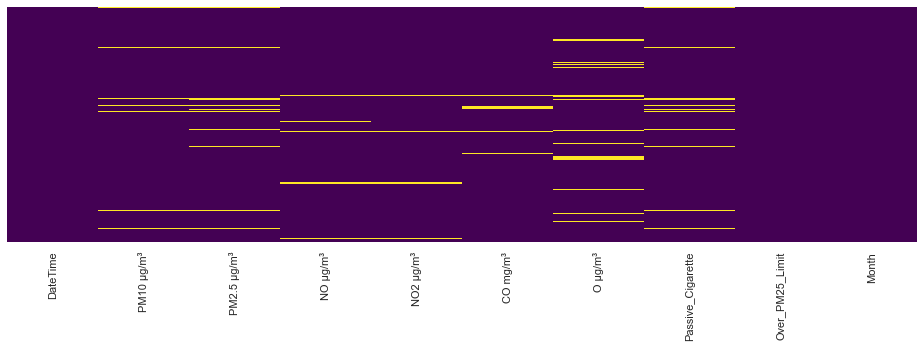

In [33]:
plt.figure(figsize=(13,5))
sns.heatmap(df_HE.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()
plt.show()

Last check before saving and then **saving the df dataframe to csv file**,

ready to be **merged with the second dataframe** regarding **weather** in Milan, January 2014 / December 2019.

In [34]:
#sprint_info(df_HE)

## Saving the Weather final Data frame to a CSV file

In [35]:
df_HE.to_csv("Milan_Final_Harm_Elem_2014_2019.csv", index=False)

In [36]:
Milan_Final_Harm_Elem_2014_2019 = pd.read_csv("Milan_Final_Harm_Elem_2014_2019.csv")

In [37]:
#Milan_Final_Harm_Elem_2014_2019.describe()

In [38]:
#sprint_info(Milan_Final_Harm_Elem_2014_2019)

## Bibliography

- Earth, B. (2021, January 21). Air Pollution and Cigarette Equivalence. Berkeley Earth.
    http://berkeleyearth.org/air-pollution-and-cigarette-equivalence/.
    

- Standards - Air Quality - Environment - European Commission. (2020). European Commission. https://ec.europa.eu/environment/air/quality/standards.htm


- Doreswamy, K S, H., KM, Y., & Gad, I. (2020). Forecasting Air Pollution Particulate Matter (PM2.5) Using Machine Learning Regression Models. Procedia Computer Science, 171, 2057–2066.


- Carugno, M., Consonni, D., Randi, G., Catelan, D., Grisotto, L., Bertazzi, P. A., Biggeri, A., & Baccini, M. (2016a). Air pollution exposure, cause-specific deaths and hospitalizations in a highly polluted Italian region. Environmental Research, 147, 415–424.


- Khomenko, S., Cirach, M., Pereira-Barboza, E., Mueller, N., Barrera-Gómez, J., Rojas-Rueda, D., de Hoogh, K., Hoek, G., & Nieuwenhuijsen, M. (2021a). Premature mortality due to air pollution in European cities: a health impact assessment. The Lancet Planetary Health, 1.